Stock Market Prediction And Forecasting Using Stacked LSTM

In [87]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [88]:
df=pd.read_csv('AAPL.csv')

In [89]:
df.head(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.95,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.45,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0


In [90]:
df.tail(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.20,316.68,27876215,319.23,319.52,316.20,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.87,318.66,25672211,316.85,320.89,315.87,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.35,315.77,20450754,318.89,319.23,315.35,315.77,20450754,0.0,1.0


In [91]:
df1 = df['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

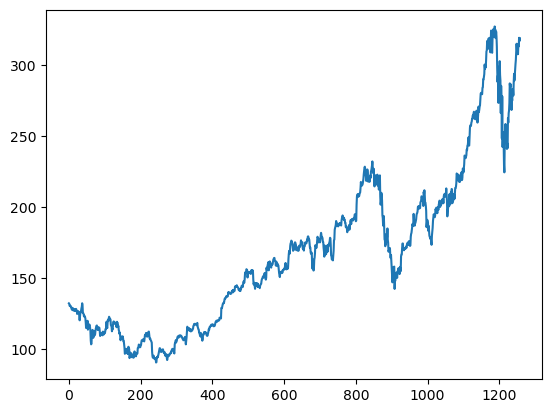

In [92]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [94]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [95]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [96]:
training_size,test_size

(817, 441)

In [97]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [98]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [99]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [100]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [101]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [102]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [103]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [104]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64) #,verbose=1

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0200 - val_loss: 0.0412
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 8.1211e-04 - val_loss: 0.0049
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6.2945e-04 - val_loss: 0.0041
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6.0334e-04 - val_loss: 0.0048
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 6.1453e-04 - val_loss: 0.0039
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.7871e-04 - val_loss: 0.0037
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.9002e-04 - val_loss: 0.0038
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.5561e-04 - val_loss: 0.0036
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.5483e-04 - val_loss: 0.0034
Epoch 12/100
12/12 

In [107]:
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [108]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [109]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.45822294658444

In [110]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

243.02686448431098

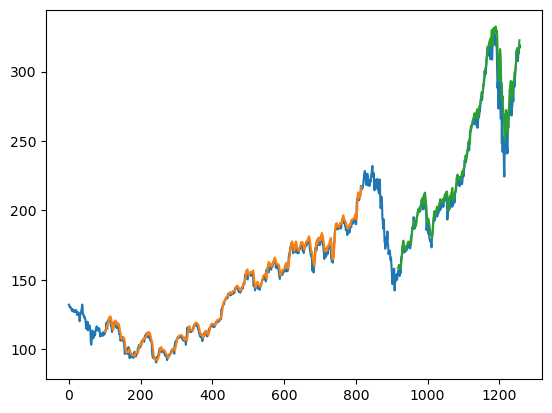

In [111]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# The blue line is original data, orange line is training data prediction, green line is testing data prediction

In [121]:
#len(test_data)

In [113]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [114]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [115]:
temp_input[:10]

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415]

In [116]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9886271357536316], [1.0012962818145752], [1.0158215761184692], [1.0291197299957275], [1.0406399965286255], [1.0504467487335205], [1.0588353872299194], [1.0662524700164795], [1.0731985569000244], [1.0801243782043457], [1.0873676538467407], [1.0951130390167236], [1.1033955812454224], [1.1121302843093872], [1.1211539506912231], [1.1302706003189087], [1.139296293258667], [1.1480880975723267], [1.156563639640808], [1.1646909713745117], [1.1724953651428223], [1.1800379753112793], [1.1873955726623535], [1.1946359872817993], [1.2018108367919922], [1.208956003189087], [1.2160818576812744], [1.2231842279434204], [1.2302403450012207], [1.237223505973816]]


In [117]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [118]:
len(df1)

1258

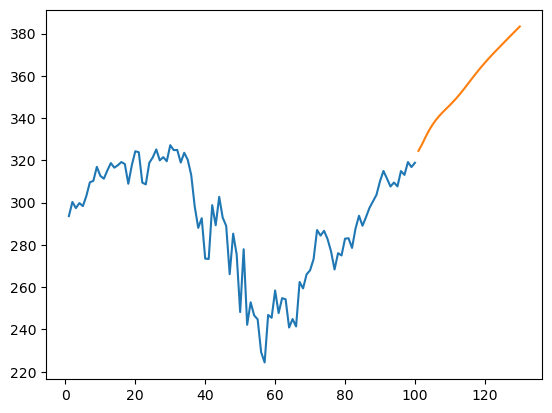

In [119]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
#The blue line is original data, orange line is predicted data for 30 days

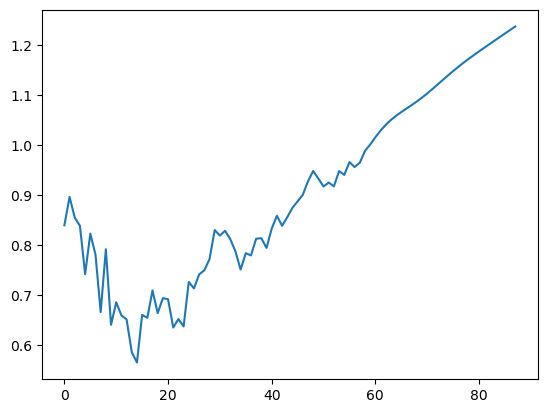

In [120]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

#The plot shows original data for next 30 days

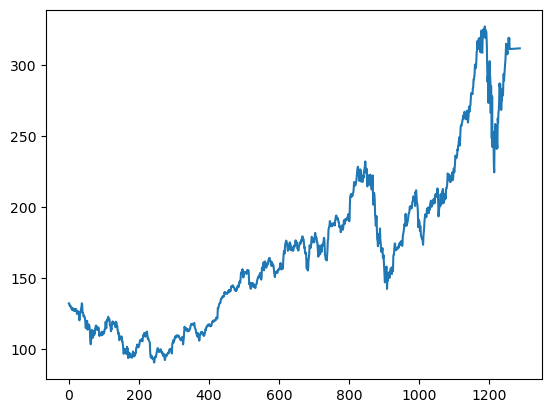

In [45]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)